In [1]:
import pickle
import os
import pandas

In [120]:
# lenet experiments
from collections import defaultdict
net1 = 'lenet'
net2 = 'lenet_old'

path1 =  os.getcwd() + '/results/' + net1 + '/'
path2 =  os.getcwd() + '/results/' + net2 + '/'

files1 = os.listdir(f"{path1}")
files2 = os.listdir(f"{path2}")

lenet_grid = {
    'batch': [256, 128, 64],
    'k': [-1],
    'parallelism': [1, 2, 4, 6]
}

results_accuracy1 = defaultdict(dict)
results_time1 = defaultdict(dict)
results_accuracy2 = defaultdict(dict)
results_time2 = defaultdict(dict)

for file in files1:
    with open(f'{path1}/{file}', 'rb') as f1:   
        training_results1 = pickle.loads(f1.read())
        id = training_results1['id'].iloc[-1]
        batch_size = training_results1['batch_size'].iloc[-1]
        epoch_duration = training_results1['epoch_duration'].iloc[-1]
        function_numbers = training_results1['default_parallelism'].iloc[-1]
        accuracy = training_results1['accuracy'].iloc[-1]
        results_accuracy1[batch_size][function_numbers] = accuracy[-1]
        results_time1[batch_size][function_numbers] = epoch_duration[-1]

for file in files2:
    with open(f'{path2}/{file}', 'rb') as f2:   
        training_results2 = pickle.loads(f2.read())
        id = training_results2['id'].iloc[-1]
        batch_size = training_results2['batch_size'].iloc[-1]
        epoch_duration = training_results2['epoch_duration'].iloc[-1]
        function_numbers = training_results2['default_parallelism'].iloc[-1]
        accuracy = training_results2['accuracy'].iloc[-1]
        results_accuracy2[batch_size][function_numbers] = accuracy[-1]
        results_time2[batch_size][function_numbers] = epoch_duration[-1]

print('---------------')
print(results_accuracy1)
print('---------------')
print(results_time1)
print('---------------')
print(results_accuracy2)
print('---------------')
print(results_time2)

---------------
defaultdict(<class 'dict'>, {64: {6: 97.99961538461538, 2: 98.44721153846154, 1: 98.22850318471338, 4: 98.3526923076923}, 128: {1: 88.03401898734177, 4: 96.061875, 2: 97.65725961538462, 6: 87.63846153846154}, 256: {4: 86.2446875, 6: 81.53232142857142, 2: 86.730375, 1: 96.30859375}})
---------------
defaultdict(<class 'dict'>, {64: {6: 28.113143705, 2: 51.355821836, 1: 119.437614215, 4: 29.546412326}, 128: {1: 103.553986904, 4: 29.062717572, 2: 44.119654377, 6: 24.456608152}, 256: {4: 27.54491101, 6: 25.044725465, 2: 41.244147281, 1: 97.782545023}})
---------------
defaultdict(<class 'dict'>, {128: {2: 97.6870576923077, 1: 88.02412974683544, 4: 86.6866875, 6: 96.97876373626373}, 64: {1: 88.00756369426752, 4: 98.28288461538462, 6: 97.87932692307693, 2: 98.47721153846155}, 256: {6: 72.5725892857143, 4: 86.078, 1: 86.806640625, 2: 86.7398125}})
---------------
defaultdict(<class 'dict'>, {128: {2: 43.354265315, 1: 105.639189785, 4: 24.567639791, 6: 18.858894826}, 64: {1: 12

/home/ning/miniconda3/envs/kubeml/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator


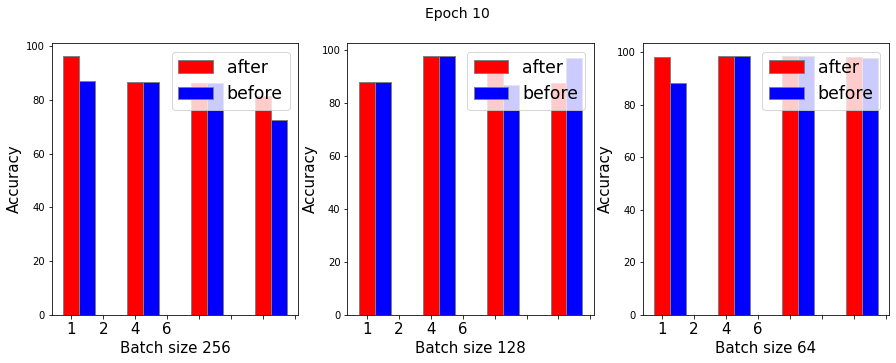

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# set height of bar
barWidth = 0.25
labels = ['', '1', '2', '4', '6'] 
# Set position of bar on X axis
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
x = np.arange(len(labels))
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))



for idx, batch in enumerate([256, 128, 64]):
        y_bar1 = []
        y_bar2 = []
        for parallelism in [1, 2, 4, 6]:
            y_bar1.append(results_accuracy1[batch][parallelism]) 
            y_bar2.append(results_accuracy2[batch][parallelism])      
        # Make the plot
        ax[idx].bar(br1, y_bar1, color ='r', width = barWidth,
                edgecolor ='grey', label ='after')
        ax[idx].legend(loc="upper right", fontsize = 'xx-large')
        ax[idx].bar(br2, y_bar2, color ='b', width = barWidth,
                edgecolor ='grey', label ='before')
        ax[idx].legend(loc="upper right", fontsize = 'xx-large')
        ax[idx].yaxis.label.set_size('xx-large')
        ax[idx].set_xlabel(f'Batch size {batch}', fontsize = 15)
        ax[idx].set_ylabel('Accuracy',  fontsize = 15)
        ax[idx].set_xticklabels(labels,  fontsize = 15)
fig.suptitle('Epoch 10',
             fontsize = 14)
plt.show()


/home/ning/miniconda3/envs/kubeml/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


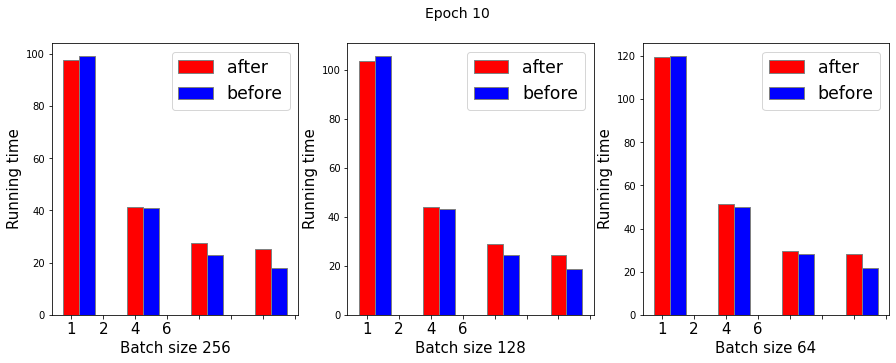

In [132]:


# set height of bar
barWidth = 0.25
labels = ['', '1', '2', '4', '6'] 
# Set position of bar on X axis
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
x = np.arange(4)

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))



for idx, batch in enumerate([256, 128, 64]):
        y_bar1 = []
        y_bar2 = []
        for parallelism in [1, 2, 4, 6]:
            y_bar1.append(results_time1[batch][parallelism]) 
            y_bar2.append(results_time2[batch][parallelism])      
        # Make the plot
        ax[idx].bar(br1, y_bar1, color ='r', width = barWidth,
                edgecolor ='grey', label ='after')
        ax[idx].legend(loc="upper right", fontsize = 'xx-large')
        ax[idx].bar(br2, y_bar2, color ='b', width = barWidth,
                edgecolor ='grey', label ='before')
        ax[idx].legend(loc="upper right", fontsize = 'xx-large')
        ax[idx].yaxis.label.set_size('xx-large')
        ax[idx].set_xlabel(f'Batch size {batch}', fontsize = 15)
        ax[idx].set_ylabel('Running time',  fontsize = 15)
        ax[idx].set_xticklabels(labels,  fontsize = 15)
fig.suptitle('Epoch 10',
             fontsize = 14)
plt.show()


In [133]:
# resnet experiments
from collections import defaultdict
net1 = 'resnet34'
net2 = 'resnet34_old'

path1 =  os.getcwd() + '/results/' + net1 + '/'
path2 =  os.getcwd() + '/results/' + net2 + '/'

files1 = os.listdir(f"{path1}")
files2 = os.listdir(f"{path2}")


results_accuracy1 = defaultdict(dict)
results_time1 = defaultdict(dict)
results_accuracy2 = defaultdict(dict)
results_time2 = defaultdict(dict)

for file in files1:
    with open(f'{path1}/{file}', 'rb') as f1:   
        training_results1 = pickle.loads(f1.read())
        id = training_results1['id'].iloc[-1]
        batch_size = training_results1['batch_size'].iloc[-1]
        epoch_duration = training_results1['epoch_duration'].iloc[-1]
        function_numbers = training_results1['default_parallelism'].iloc[-1]
        accuracy = training_results1['accuracy'].iloc[-1]
        results_accuracy1[batch_size][function_numbers] = accuracy[-1]
        results_time1[batch_size][function_numbers] = epoch_duration[-1]

for file in files2:
    with open(f'{path2}/{file}', 'rb') as f2:   
        training_results2 = pickle.loads(f2.read())
        id = training_results2['id'].iloc[-1]
        batch_size = training_results2['batch_size'].iloc[-1]
        epoch_duration = training_results2['epoch_duration'].iloc[-1]
        function_numbers = training_results2['default_parallelism'].iloc[-1]
        accuracy = training_results2['accuracy'].iloc[-1]
        results_accuracy2[batch_size][function_numbers] = accuracy[-1]
        results_time2[batch_size][function_numbers] = epoch_duration[-1]

print('---------------')
print(results_accuracy1)
print('---------------')
print(results_time1)
print('---------------')
print(results_accuracy2)
print('---------------')
print(results_time2)

---------------
defaultdict(<class 'dict'>, {64: {6: 52.70221153846154, 4: 55.6525, 1: 65.82404458598727, 2: 61.620673076923076}, 128: {1: 64.39873417721519, 4: 45.4946875, 6: 52.28314560439561, 2: 60.58096153846154}, 256: {1: 63.76953125, 4: 57.677125, 2: 58.637375, 6: 41.60616071428571}})
---------------
defaultdict(<class 'dict'>, {64: {6: 138.480878683, 4: 147.781733765, 1: 499.090949366, 2: 248.619577549}, 128: {1: 415.909587389, 4: 118.35132386, 6: 106.829898773, 2: 185.273735069}, 256: {1: 389.720165688, 4: 107.433024772, 2: 170.905394647, 6: 99.074341071}})
---------------
defaultdict(<class 'dict'>, {128: {4: 60.172, 2: 64.11147115384615, 6: 56.038296703296716, 1: 70.0751582278481}, 64: {2: 67.17076923076922, 6: 59.91701923076923, 4: 63.44403846153846, 1: 64.6297770700637}, 256: {6: 48.981249999999996, 4: 57.767125, 1: 60.29296875, 2: 63.55990625}})
---------------
defaultdict(<class 'dict'>, {128: {4: 106.749608704, 2: 178.396966643, 6: 101.253619921, 1: 406.584035624}, 64: {

/home/ning/miniconda3/envs/kubeml/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator


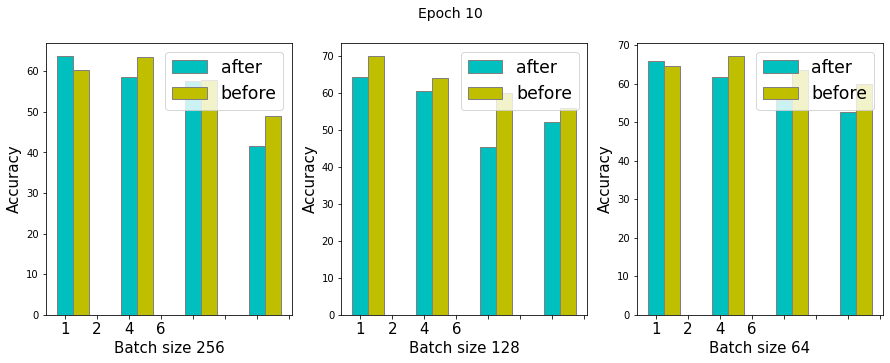

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# set height of bar
barWidth = 0.25
labels = ['', '1', '2', '4', '6'] 
# Set position of bar on X axis
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
x = np.arange(len(labels))
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))



for idx, batch in enumerate([256, 128, 64]):
        y_bar1 = []
        y_bar2 = []
        for parallelism in [1, 2, 4, 6]:
            y_bar1.append(results_accuracy1[batch][parallelism]) 
            y_bar2.append(results_accuracy2[batch][parallelism])      
        # Make the plot
        ax[idx].bar(br1, y_bar1, color ='c', width = barWidth,
                edgecolor ='grey', label ='after')
        ax[idx].legend(loc="upper right", fontsize = 'xx-large')
        ax[idx].bar(br2, y_bar2, color ='y', width = barWidth,
                edgecolor ='grey', label ='before')
        ax[idx].legend(loc="upper right", fontsize = 'xx-large')
        ax[idx].yaxis.label.set_size('xx-large')
        ax[idx].set_xlabel(f'Batch size {batch}', fontsize = 15)
        ax[idx].set_ylabel('Accuracy',  fontsize = 15)
        ax[idx].set_xticklabels(labels,  fontsize = 15)
fig.suptitle('Epoch 10',
             fontsize = 14)
plt.show()


AttributeError: 'AxesSubplot' object has no attribute 'set_xtick'

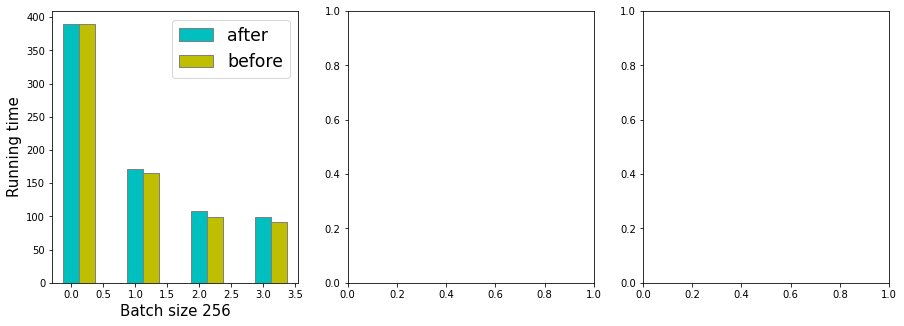

In [154]:
# set height of bar
barWidth = 0.25
labels = ['', '1', '2', '4', '6'] 
# Set position of bar on X axis
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
x = np.arange(4)

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))



for idx, batch in enumerate([256, 128, 64]):
        y_bar1 = []
        y_bar2 = []
        for parallelism in [1, 2, 4, 6]:
            y_bar1.append(results_time1[batch][parallelism]) 
            y_bar2.append(results_time2[batch][parallelism])      
        # Make the plot
        ax[idx].bar(br1, y_bar1, color ='c', width = barWidth,
                edgecolor ='grey', label ='after')
        ax[idx].legend(loc="upper right", fontsize = 'xx-large')
        ax[idx].bar(br2, y_bar2, color ='y', width = barWidth,
                edgecolor ='grey', label ='before')
        ax[idx].legend(loc="upper right", fontsize = 'xx-large')
        ax[idx].yaxis.label.set_size('xx-large')
        ax[idx].set_xlabel(f'Batch size {batch}', fontsize = 15)
        ax[idx].set_ylabel('Running time',  fontsize = 15)
        #ax[idx].set_xticklabels( labels, fontsize = 15)
        ax[idx].set_xtick(['', 'a', 'b', 'c', 'd'])
fig.suptitle('Epoch 10',
             fontsize = 14)
plt.show()


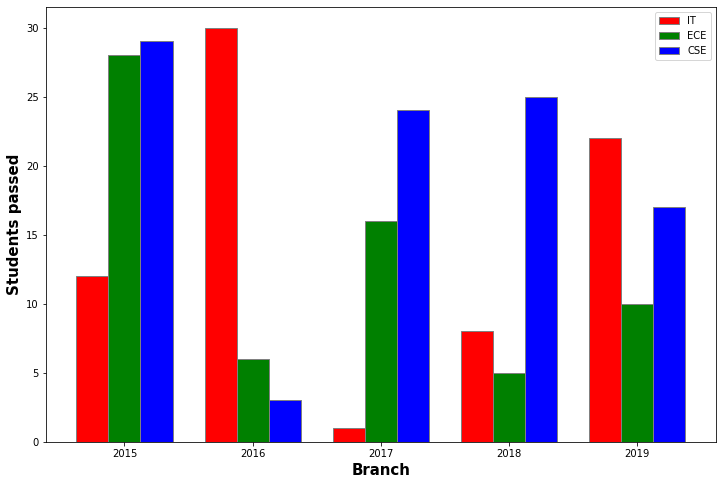

In [143]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = [12, 30, 1, 8, 22]
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='ECE')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019'])
 
plt.legend()
plt.show()